In [2]:
import glob
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [3]:
path_names=[]
for path in os.listdir("test_voyelles"):
    path_names.append(path)

test=[]   
for file in path_names:
    a=np.loadtxt("test_voyelles/"+file, dtype='int', delimiter='\t')
    test.append(a)
    
test_voy = np.asarray(test)

In [4]:
path_names_train=[]
for path in os.listdir("train_voyelles"):
    path_names_train.append(path)

train=[]   
for file in path_names_train:
    b=np.genfromtxt("train_voyelles/"+file, dtype='int', delimiter='\t')
    train.append(b)
    
train_voy = np.asarray(train)

In [5]:
train_lab = np.loadtxt("train_labels.txt",dtype=str)
test_lab = np.loadtxt("test_labels.txt",dtype=str)

In [6]:
train_voy=train_voy / 255.0
test_voy = test_voy / 255.0

In [7]:
train_lab_num = [0 if voy == 'A' else 1 if voy == 'E' else 2 if voy == 'I' else 3 if voy == 'O' else 4 for voy in train_lab]
test_lab_num = [0 if voy == 'A' else 1 if voy == 'E' else 2 if voy == 'I' else 3 if voy == 'O' else 4 for voy in test_lab]

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(18, 18)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_voy, np.asarray((train_lab_num)), epochs=10)

Epoch 1/10
141/141 [==============================] - 1s 3ms/step - loss: 1.0445 - accuracy: 0.6484
Epoch 2/10
141/141 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.8407
Epoch 3/10
141/141 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8678
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.3817 - accuracy: 0.8833
Epoch 5/10
141/141 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8971
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 0.3025 - accuracy: 0.9082
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 0.2971 - accuracy: 0.9091
Epoch 8/10
141/141 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.9104
Epoch 9/10
141/141 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.9213
Epoch 10/10
141/141 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.9276

In [11]:
test_loss, test_acc = model.evaluate(test_voy, np.asarray((test_lab_num)), verbose=2)
print(test_acc)

16/16 - 0s - loss: 0.2503 - accuracy: 0.9300 - 378ms/epoch - 24ms/step
0.9300000071525574


In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [13]:
predictions = probability_model.predict(test_voy)

In [14]:
np.argmax(predictions[0])

2

In [15]:
train_labels = ['A', 'E', 'I', 'O', 'U'] 

voy_pred=[]
for preds in predictions:
    li=np.argmax(preds)
    lab=train_labels[li]
    voy_pred.append(lab)

In [17]:
print(classification_report(test_lab, voy_pred))

              precision    recall  f1-score   support

           A       0.93      0.98      0.95       105
           E       0.99      0.82      0.90       108
           I       0.90      0.98      0.94        92
           O       0.93      0.95      0.94       108
           U       0.91      0.92      0.91        87

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



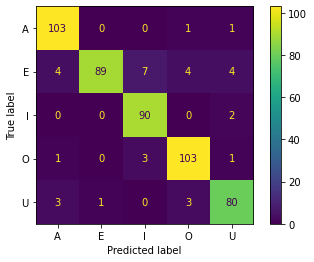

In [18]:
conf_mat_nn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_lab, voy_pred, labels=['A','E','I','O','U']), display_labels=['A','E','I','O','U'])
conf_mat_nn.plot()

In [19]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(train_labels[predicted_label],
                                100*np.max(predictions_array),
                                train_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

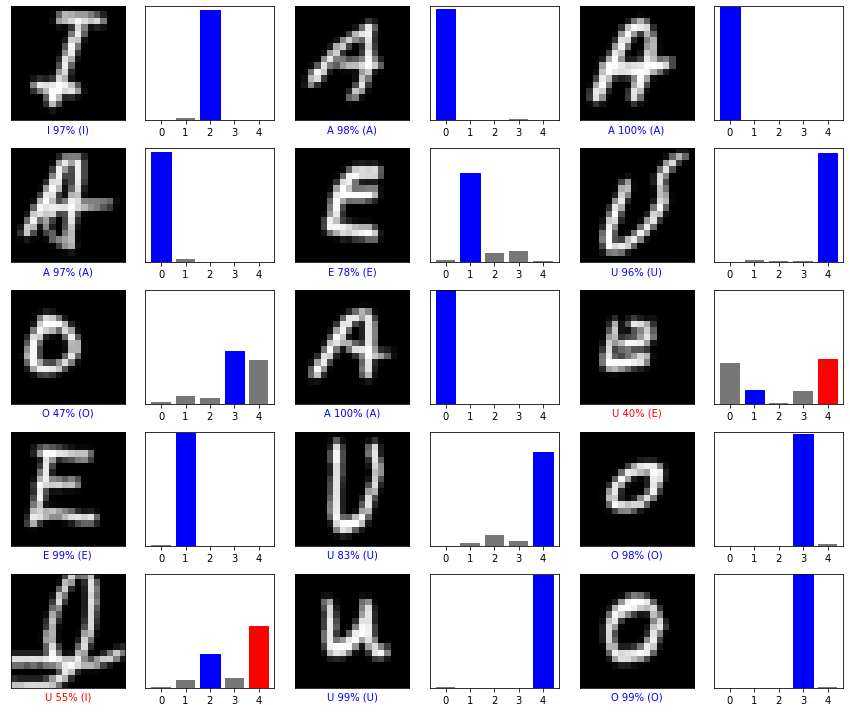

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_lab_num, test_voy)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_lab_num)
plt.tight_layout()
plt.show()

In [21]:
errors=[]
for i in range(len(test_lab)):
    if test_lab[i] != voy_pred[i]:
        errors.append(i)
errors[0:2]

[8, 12]

TRUE :  E
PRED:  U


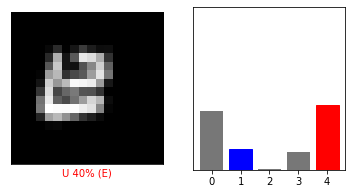

TRUE :  I
PRED:  U


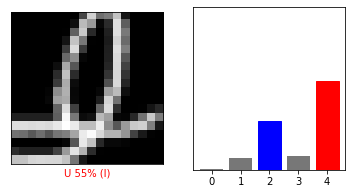

In [24]:
#two errors

print("TRUE : ", test_lab[8])
print("PRED: ", voy_pred[8])
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lab_num, test_voy)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_lab_num)
plt.show()

print("TRUE : ", test_lab[12])
print("PRED: ", voy_pred[12])
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lab_num, test_voy)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_lab_num)
plt.show()